In [318]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/train.csv')
df.head(20)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
5,6,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,5.57 MPG (AS),38.28 mpg Imp.,8.86 MPG (AS),217.0
6,7,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.52 L/100km,14.76 mpg Imp.,12.75 L/100 km,174.0
7,8,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,28.55 MPG (AS),2.06 liters per 100 km,18.33 km/L,246.0
8,9,CHEVO,SUV - STANDARD,3.6,NaN,A9,X,9.16 mpg Imp.,2.08 L/10km,26.31 L/100km,278.0
9,10,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.84 km per L,18.13 L/100 km,-9999,202.0


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     137141 non-null  int64  
 1   Make                   137141 non-null  object 
 2   Vehicle Class          135816 non-null  object 
 3   Engine Size(L)         120522 non-null  object 
 4   Cylinders              122986 non-null  object 
 5   Transmission           134536 non-null  object 
 6   Fuel Type              135286 non-null  object 
 7   Fuel Consumption City  134719 non-null  object 
 8   Fuel Consumption Hwy   134573 non-null  object 
 9   Fuel Consumption Comb  134559 non-null  object 
 10  CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 11.5+ MB


In [320]:
df.shape

(137141, 11)

In [321]:
df.describe()

,Id,CO2 Emissions(g/km)
count,137141.000000,137141.000000
mean,68571.000000,250.471627
std,39589.340971,76.956554
min,1.000000,96.000000
25%,34286.000000,201.000000
50%,68571.000000,234.000000
75%,102856.000000,291.000000
max,137141.000000,822.111635


In [322]:
df.isnull().sum()

Id                           0
Make                         0
Vehicle Class             1325
Engine Size(L)           16619
Cylinders                14155
Transmission              2605
Fuel Type                 1855
Fuel Consumption City     2422
Fuel Consumption Hwy      2568
Fuel Consumption Comb     2582
CO2 Emissions(g/km)          0
dtype: int64

<Axes: >

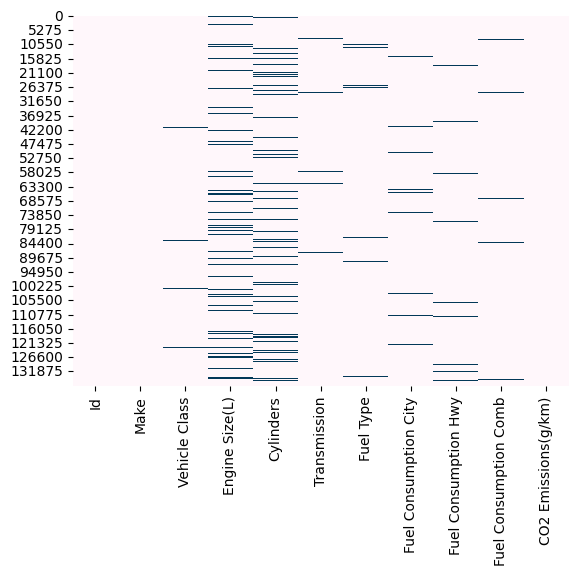

In [323]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [324]:
sum_null = df.isnull().sum()
count_null = df.isnull().count()

total = sum_null.sort_values(ascending=False)
percent = sum_null/count_null.sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(10)

,Total,Percent
Engine Size(L),16619,0.121182
Cylinders,14155,0.103215
Transmission,2605,0.018995
Fuel Consumption Comb,2582,0.018827
Fuel Consumption Hwy,2568,0.018725
Fuel Consumption City,2422,0.017661
Fuel Type,1855,0.013526
Vehicle Class,1325,0.009662
Id,0,0.000000
Make,0,0.000000


Make
FOLD            0.131842
CHEVO           0.121153
BMV             0.108881
TOYOTI          0.069724
NIRRAN          0.053135
JIPU            0.052807
DOGE            0.050656
KIO             0.046981
GONDA           0.044006
RYUNDAI         0.043204
FOLKSWA         0.039244
LECUS           0.037706
MATSUDA         0.036838
CADILUXE        0.032937
BARUSU          0.029036
TOLVO           0.026214
MITSU           0.019695
LAND CRAWLER    0.017901
ASURA           0.014875
FIAR            0.014671
LAMBOGI         0.008495
Name: proportion, dtype: float64


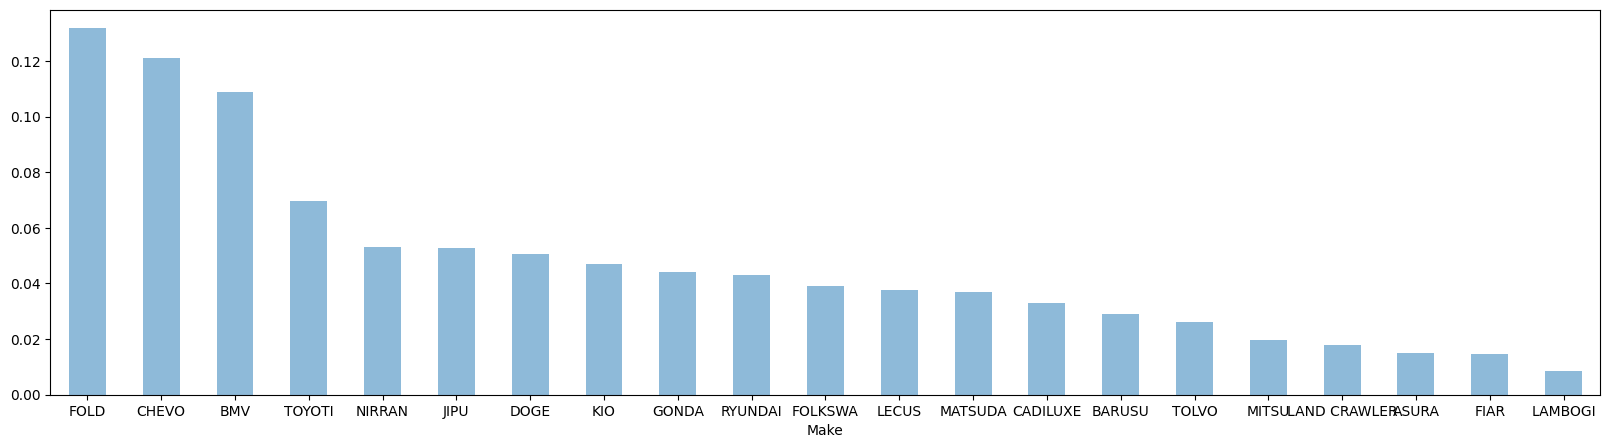

In [325]:
import matplotlib.pyplot as plt

norm = df['Make'].value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.show()

Transmission
AS6              0.215006
AS8              0.148771
M6               0.132938
A6               0.091626
AV               0.055851
A8               0.050031
M5               0.035753
AS10             0.032430
A9               0.026417
AM7              0.026275
AV6              0.022462
AV7              0.020671
AM6              0.018166
A5               0.015513
not-recorded     0.012614
AS9              0.012398
A4               0.009856
na               0.007165
unestablished    0.006496
AV8              0.006489
not-available    0.006467
unspecified      0.006459
unknown          0.006422
-1               0.006340
missing          0.006273
AS7              0.005396
AS5              0.005211
A10              0.002884
AM8              0.002512
AV10             0.002193
M7               0.002141
AM9              0.000565
A7               0.000208
Name: proportion, dtype: float64


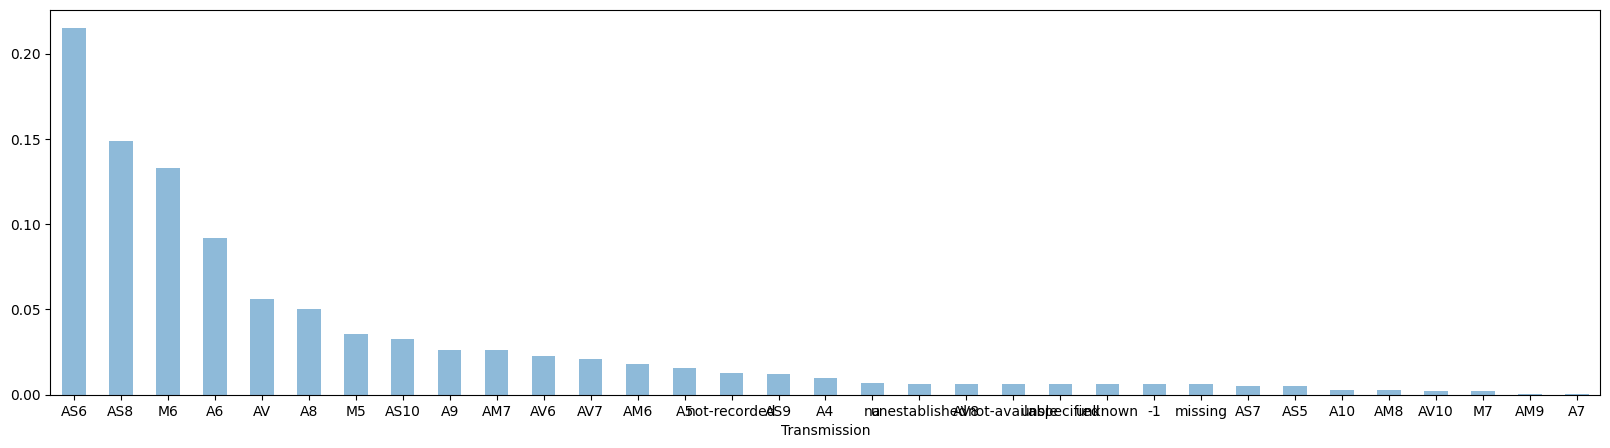

In [326]:
norm = df['Transmission'].value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.show()

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     137141 non-null  int64  
 1   Make                   137141 non-null  object 
 2   Vehicle Class          135816 non-null  object 
 3   Engine Size(L)         120522 non-null  object 
 4   Cylinders              122986 non-null  object 
 5   Transmission           134536 non-null  object 
 6   Fuel Type              135286 non-null  object 
 7   Fuel Consumption City  134719 non-null  object 
 8   Fuel Consumption Hwy   134573 non-null  object 
 9   Fuel Consumption Comb  134559 non-null  object 
 10  CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 11.5+ MB


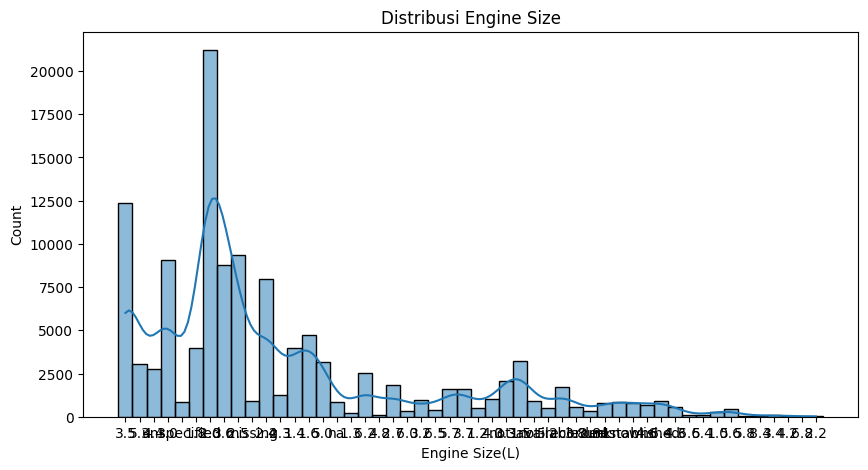

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Engine Size(L)'], kde=True)
plt.title('Distribusi Engine Size')
plt.show()

Distribusi data skewed ke kiri

In [329]:
# Fill missing values dari kolom 'Engine Size(L)' dengan nilai median
df['Engine Size(L)'] = pd.to_numeric(df['Engine Size(L)'], errors='coerce')
med_val = df['Engine Size(L)'].median()
df['Engine Size(L)'].fillna(med_val, inplace=True)

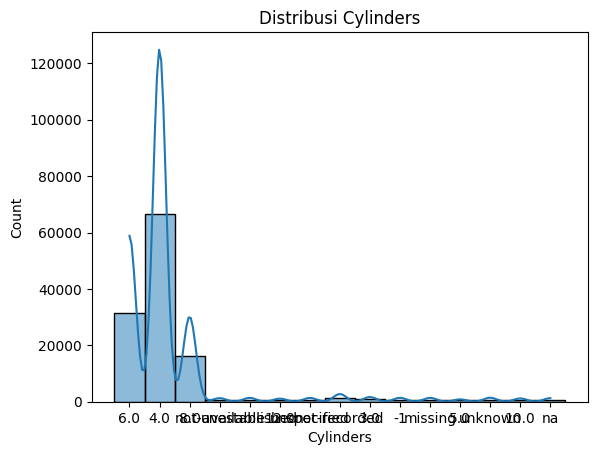

In [330]:
sns.histplot(df['Cylinders'], kde=True)
plt.title('Distribusi Cylinders')
plt.show()

In [331]:
df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
med_val = df['Cylinders'].median()
df['Cylinders'].fillna(med_val, inplace=True)

In [332]:
df.isnull().sum()

Id                          0
Make                        0
Vehicle Class            1325
Engine Size(L)              0
Cylinders                   0
Transmission             2605
Fuel Type                1855
Fuel Consumption City    2422
Fuel Consumption Hwy     2568
Fuel Consumption Comb    2582
CO2 Emissions(g/km)         0
dtype: int64

In [333]:
# Split the column into 'Number' and 'Unit' based on the pattern
df_fuel_city = df['Fuel Consumption City'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
df_fuel_city['number'] = pd.to_numeric(df_fuel_city['number'], errors='coerce')
# Display the new DataFrame
df_fuel_city.head()


,number,unit
0,8.64,liters per 100 km
1,27.27,liters per 100 km
2,0.17,L/10km
3,6.52,km per L
4,20.15,L/100km


In [334]:
df_fuel_city.unit.value_counts()

unit
L/10km               16614
L/100km              16612
km per L             16600
km/L                 16408
L/100 km             16363
mpg Imp.             16308
liters per 100 km    16098
MPG (AS)             16090
                      2403
Name: count, dtype: int64

In [335]:
df_fuel_city.dtypes

number    float64
unit       object
dtype: object

In [336]:
convert_factors = {
    'km/L': 1, 
    'liters per 100 km': 100,
    'km per L': 1,
    'mpg Imp.': 0.354006,
    'MPG (AS)': 0.425144, 
    'L/100 km': 100,
    'L/100km': 100,
    'L/10km': 10
}

df['Fuel Consumption City (km/l)'] = df_fuel_city.apply(lambda row: row['number'] * convert_factors.get(row['unit'], 1) if pd.notna(row['number']) else np.nan, axis=1)
df.drop(columns=['Fuel Consumption City'], inplace=True)

df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Fuel Consumption City (km/l)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,6.14 L/100 km,37.59 mpg Imp.,306.0,864.00
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,4.0,A6,E,30.76 liters per 100 km,28.84 L/100 km,283.0,2727.00
2,3,BMV,SUBCOMPACT,4.4,4.0,M6,Z,2.03 liters per 100 km,zero,329.0,1.70
3,4,KIO,SUV - SMALL,2.5,4.0,AS6,X,1.59 L/10km,NaN,270.0,6.52
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,0.60 L/10km,1.38 L/10km,193.0,2015.00


In [337]:
# Split the column into 'Number' and 'Unit' based on the pattern
df_fuel_Hwy = df['Fuel Consumption Hwy'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
df_fuel_Hwy['number'] = pd.to_numeric(df_fuel_Hwy['number'], errors='coerce')

df_fuel_Comb = df['Fuel Consumption Comb'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
df_fuel_Comb['number'] = pd.to_numeric(df_fuel_Comb['number'], errors='coerce')

# Convert nilai berdasarkan tipe unit
df['Fuel Consumption Hwy (km/l)'] = df_fuel_Hwy.apply(lambda row: row['number'] * convert_factors.get(row['unit'], 1) if pd.notna(row['number']) else np.nan, axis=1)
df.drop(columns=['Fuel Consumption Hwy'], inplace=True)

df['Fuel Consumption Comb (km/l)'] = df_fuel_Comb.apply(lambda row: row['number'] * convert_factors.get(row['unit'], 1) if pd.notna(row['number']) else np.nan, axis=1)
df.drop(columns=['Fuel Consumption Comb'], inplace=True)

df.head()


,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (km/l),Fuel Consumption Hwy (km/l),Fuel Consumption Comb (km/l)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,306.0,864.00,614.0,13.307086
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,4.0,A6,E,283.0,2727.00,3076.0,2884.000000
2,3,BMV,SUBCOMPACT,4.4,4.0,M6,Z,329.0,1.70,203.0,NaN
3,4,KIO,SUV - SMALL,2.5,4.0,AS6,X,270.0,6.52,15.9,NaN
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,193.0,2015.00,6.0,13.800000


In [338]:
# Delete rows with missing values
df.dropna(inplace=True)

In [339]:
# Drop the 'id' column
df.drop('Id', axis=1, inplace=True)

In [340]:
# Fill missing value fuel comb dengan nilai (fuel city + fuel hwy)/2
df['Fuel Consumption Comb (km/l)'].fillna((df['Fuel Consumption City (km/l)'] + df['Fuel Consumption Hwy (km/l)'])/2, inplace=True)

df.isnull().sum()

Make                            0
Vehicle Class                   0
Engine Size(L)                  0
Cylinders                       0
Transmission                    0
Fuel Type                       0
CO2 Emissions(g/km)             0
Fuel Consumption City (km/l)    0
Fuel Consumption Hwy (km/l)     0
Fuel Consumption Comb (km/l)    0
dtype: int64

In [341]:
# Convert object to numeric
df.dtypes

Make                             object
Vehicle Class                    object
Engine Size(L)                  float64
Cylinders                       float64
Transmission                     object
Fuel Type                        object
CO2 Emissions(g/km)             float64
Fuel Consumption City (km/l)    float64
Fuel Consumption Hwy (km/l)     float64
Fuel Consumption Comb (km/l)    float64
dtype: object

In [342]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Vehicle Class'] = label_encoder.fit_transform(df['Vehicle Class'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])

df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (km/l),Fuel Consumption Hwy (km/l),Fuel Consumption Comb (km/l)
0,7,7,3.5,6.0,4,4,306.0,864.000000,614.000000,13.307086
1,4,7,5.3,4.0,4,2,283.0,2727.000000,3076.000000,2884.000000
4,1,4,3.0,6.0,32,5,193.0,2015.000000,6.000000,13.800000
5,14,1,2.5,4.0,29,5,217.0,2.368052,13.551350,3.766776
6,9,2,1.8,4.0,21,4,174.0,752.000000,5.225129,1275.000000


<Axes: >

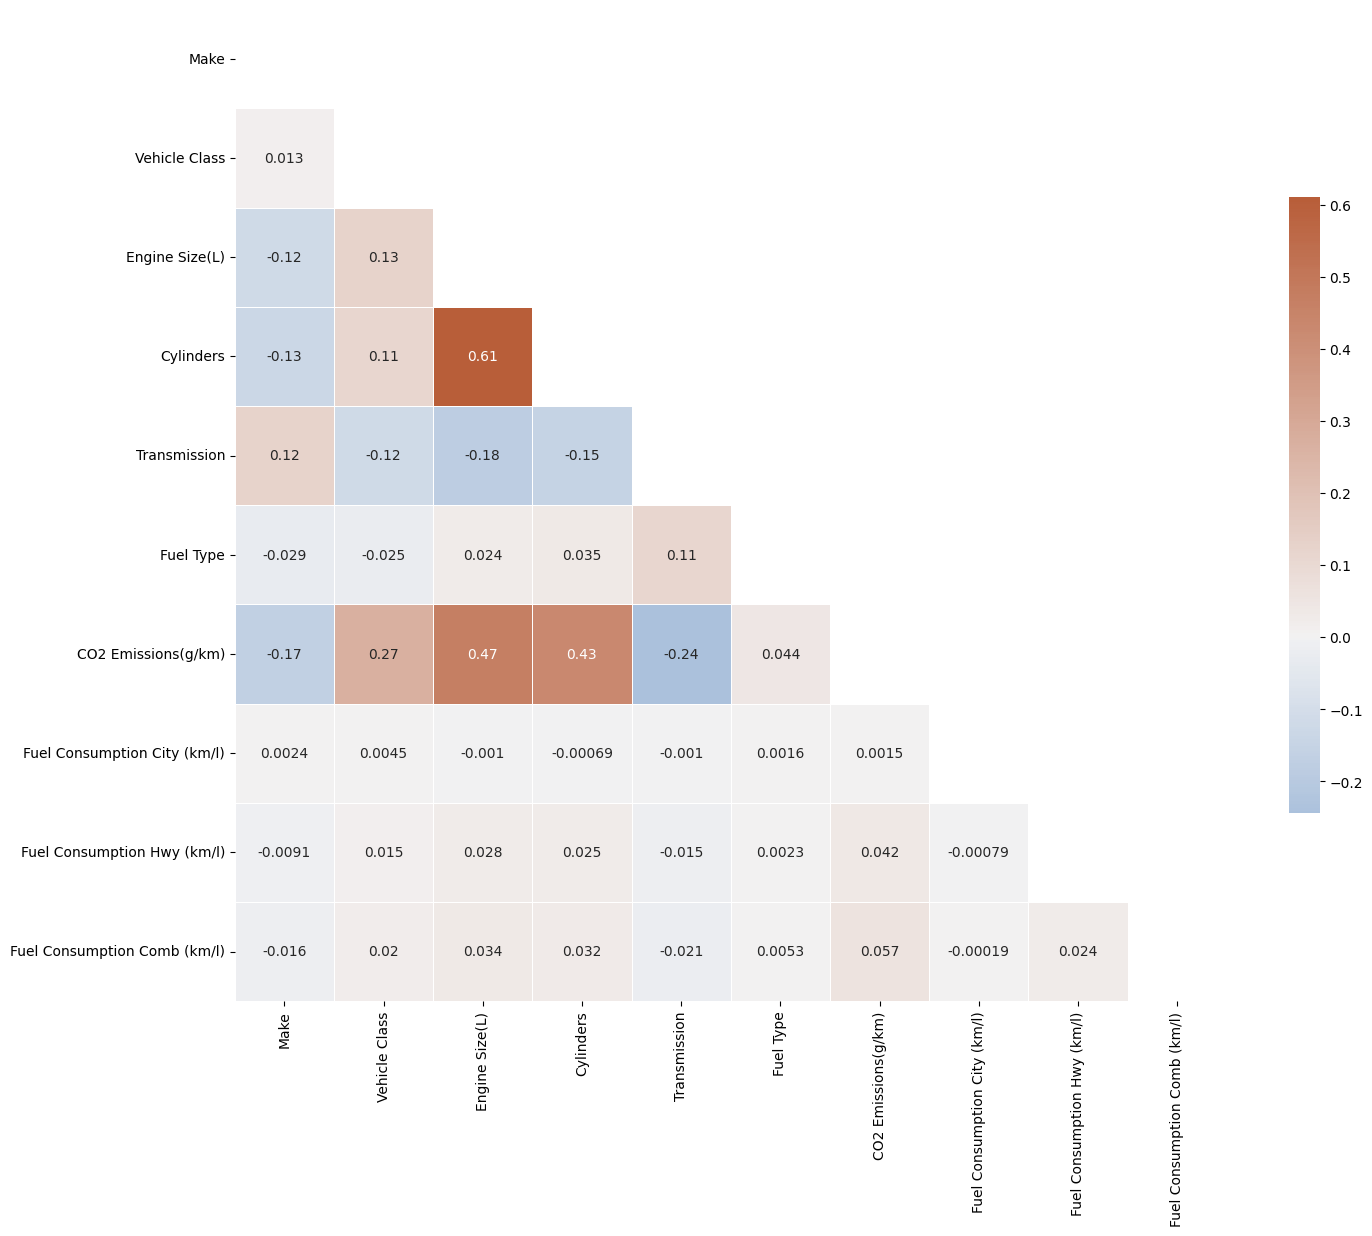

In [343]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(16,16))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

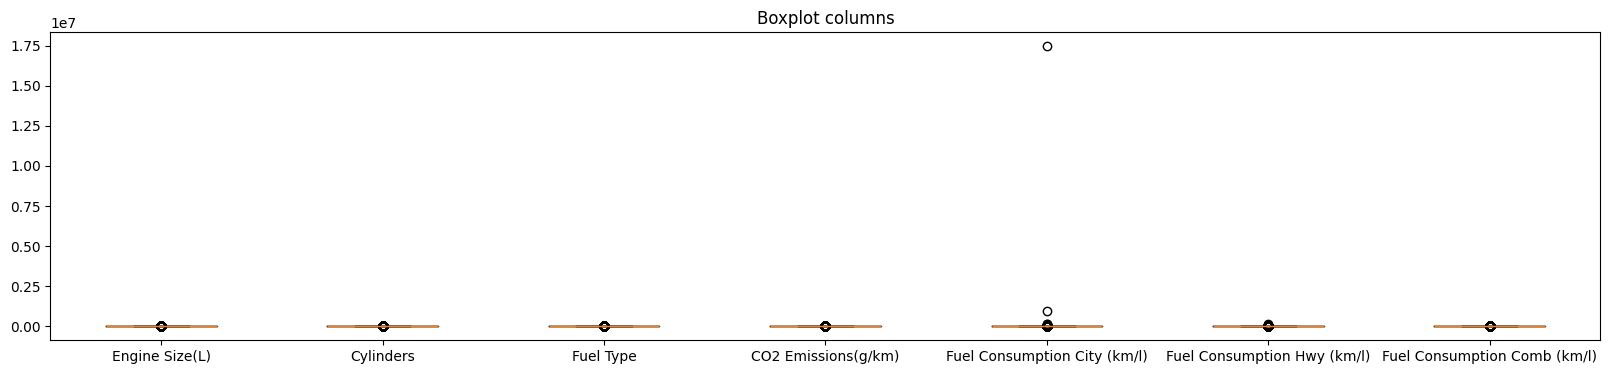

In [349]:
# Boxplot IQR to visualize outliers
exclude_cols = ['Make', 'Vehicle Class', 'Transmission']
cols_to_plot = [col for col in df.columns if col not in exclude_cols]
data_to_plot = [df[col].dropna().values for col in cols_to_plot]

plt.figure(figsize=(20, 4))
plt.boxplot(x=data_to_plot, labels=cols_to_plot)
plt.title("Boxplot columns")
plt.show()